## Model 2 - Classification

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784',as_frame=False)

In [4]:
X,y = mnist.data, mnist.target

In [5]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [6]:
X.shape

(70000, 784)

In [7]:
X[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

In [8]:
import matplotlib.pyplot as plt

In [12]:
def plot_digit(image_data):

    image = image_data.reshape(28,28)

    plt.imshow(image, cmap='binary')

    plt.axis('off')

In [10]:
some_digit =X[0]

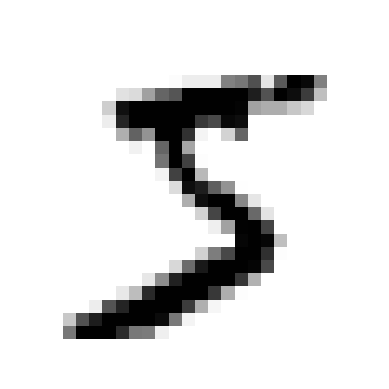

In [13]:
plot_digit(some_digit)
plt.show()

In [14]:
y[0]

'5'

#### split the data into train and test set

In [15]:
X_train, X_test, y_train, y_test = X[:60000],X[60000:],y[:60000],y[60000:]

### Binary Classifier

In [16]:
y_train_5 = (y_train == '5')

y_test_5 = (y_test == '5')

In [17]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [18]:
from sklearn.linear_model import SGDClassifier

In [19]:
sgd_clf =  SGDClassifier(random_state=42)

In [23]:
sgd_clf.fit(X_train,y_train_5)

SGDClassifier(random_state=42)

In [24]:
sgd_clf.predict([some_digit])

array([ True])

In [25]:
# evaluating the model using cross validation scores

from sklearn.model_selection import cross_val_score

In [26]:
cross_val_score(sgd_clf,X_train,y_train_5, cv = 3, scoring = 'accuracy')

array([0.95035, 0.96035, 0.9604 ])

#### Confusion Matrix - Precision & Recall Values Of Our Model

In [27]:
from sklearn.model_selection import cross_val_predict

In [28]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5 , cv= 3)

In [29]:
from sklearn.metrics import confusion_matrix

In [30]:
cm = confusion_matrix(y_train_5, y_train_pred)

In [31]:
cm

array([[53892,   687],
       [ 1891,  3530]])

In [34]:
cm.sum(axis=1)

array([54579,  5421])

##### Precision & Recall

In [36]:
precision = 3530/(3530+687)

In [37]:
precision

0.8370879772350012

In [38]:
recall = 3530 / (3530+1891)

In [39]:
recall

0.6511713705958311

In [40]:
from sklearn.metrics import precision_score,recall_score

In [41]:
precision_score(y_train_5,y_train_pred)

np.float64(0.8370879772350012)

In [42]:
recall_score(y_train_5,y_train_pred)

np.float64(0.6511713705958311)

In [43]:
from sklearn.metrics import f1_score

In [44]:
f1_score(y_train_5,y_train_pred)

np.float64(0.7325171197343847)

In [45]:
## random forest classifier
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [46]:
y_probas_forest = cross_val_predict(forest_clf, 
                                    X_train, 
                                    y_train_5, cv =3 , method ='predict_proba')

In [47]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

In [48]:
y_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5 , cv= 3)

In [49]:
f1_score(y_train_5,y_pred_forest)

np.float64(0.9242275142688448)

##### Multiclass Classification

Methods of doing muticlass classfication

* One Vs Rest
* One Vs One

In [55]:
#### one vs one classifier SVC

In [50]:
from sklearn.svm import SVC

In [51]:
svm_clf = SVC(random_state=42)

svm_clf.fit(X_train[:2000],y_train[:2000])

SVC(random_state=42)

In [52]:
svm_clf.predict([some_digit])

array(['5'], dtype=object)

In [53]:
scores_first_instance = svm_clf.decision_function([some_digit])

In [54]:
scores_first_instance

array([[ 3.79297828,  0.72949369,  6.06184129,  8.29800527, -0.29383983,
         9.30157597,  1.74723215,  2.77365456,  7.20601456,  4.82245092]])

In [56]:
# one vs rest classification using SVC

In [57]:
from sklearn.multiclass import OneVsRestClassifier

In [58]:
ovr_clf = OneVsRestClassifier(SVC(random_state=42))

In [59]:
ovr_clf.fit(X_train[:2000], y_train[:2000])

OneVsRestClassifier(estimator=SVC(random_state=42))

In [60]:
ovr_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [61]:
len(ovr_clf.estimators_)

10

In [62]:
sgd_clf =  SGDClassifier(random_state = 42)

In [63]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [64]:
sgd_clf.predict([some_digit])

array(['3'], dtype='<U1')

In [65]:
sgd_clf.decision_function([some_digit]).round()

array([[-31893., -34420.,  -9531.,   1824., -22320.,  -1386., -26189.,
        -16148.,  -4604., -12051.]])

In [66]:
cross_val_score(sgd_clf,X_train, y_train, cv =3 , scoring ='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [67]:
cross_val_score(ovr_clf,X_train[:2000], y_train, cv =3 , scoring ='accuracy')

KeyboardInterrupt: 